# MNIST Diffusion - Let's get to real images!

In [1]:
import torch
import matplotlib.pyplot as plt

from src.diffusion_playground.data.mnist import load_mnist
from src.diffusion_playground.diffusion.noise_schedule import LinearNoiseSchedule
from src.diffusion_playground.diffusion.training_utils import sample_xt

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

Using device: cpu


## Load the MNIST-Dataset

In [2]:
batch_size = 128
data_loader, input_shape = load_mnist(batch_size=batch_size)
print("Input shape:", input_shape)

100%|██████████| 9.91M/9.91M [00:01<00:00, 6.33MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 183kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 1.78MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 9.54MB/s]

Input shape: (1, 28, 28)


## Explore the Dataset

In [3]:
x0, labels = next(iter(data_loader))

print("Batch shape:", x0.shape)
print("Labels shape:", labels.shape)

Batch shape: torch.Size([128, 1, 28, 28])
Labels shape: torch.Size([128])


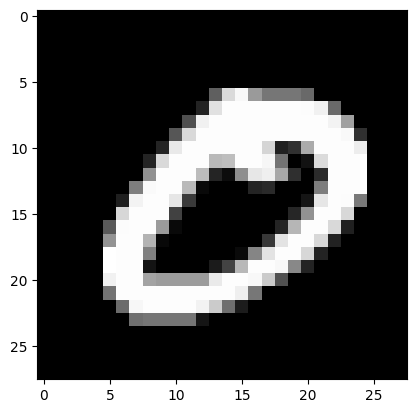

In [4]:
plt.imshow(x0[5][0], cmap="gray")
plt.show()

## Forward Diffusion on MNIST

In [5]:
# Create NoiseSchedule
schedule = LinearNoiseSchedule(time_steps=1_000)

time_steps = [0, 50, 200, 500, 999]

plt.figure(figsize=(15, 3))
for i, t in enumerate(time_steps):
    t_tensor = torch.tensor([t])
    xt, _, _ = sample_xt(x0, schedule, t=t_tensor)

    plt.subplot(1, len(time_steps), i + 1)
    plt.imshow(xt[0, 0].cpu(), cmap="gray")
    plt.title(f"t={t}")
    plt.axis("off")

plt.show()

RuntimeError: shape '[128, 1, 1, 1]' is invalid for input of size 1

<Figure size 1500x300 with 0 Axes>